In [1]:
#!/usr/bin/env python

"""
Analysis of social network 'experience project' posts from January-July 2015

You can turn this into a python script using the command: 
ipython nbconvert --to python Correlations.ipynb

hosted at https://github.com/hateley/Experience_Project
"""
#set up my environment
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the data and look at its basic qualities, using pandas
dataframe = pd.read_csv('EP_data.csv')
print(dataframe.shape)
print(dataframe.columns)
dataframe.describe()

(534305, 16)
Index(['gender', 'num_groups', 'num_entries', 'num_fans', 'num_friends', 'created', 'last_login', 'num_logins', 'last_wall_activity', 'last_circle_activity', 'birthdate', 'gid', 'content', 'date_posted', 'votes', 'num_comments'], dtype='object')


,num_groups,num_entries,num_fans,num_friends,num_logins,gid,votes,num_comments
count,534305.000000,534305.000000,534305.000000,534305.000000,534305.000000,534305.000000,534305.000000,534305.000000
mean,742.328756,4935.220947,574.018952,72.492224,426.399326,316756.950596,3.397346,2.040011
std,4400.139494,16876.095797,1478.743646,306.584001,1175.184105,338784.017951,12.010274,4.114601
min,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000
25%,28.000000,9.000000,11.000000,1.000000,3.000000,18330.000000,0.000000,0.000000
50%,107.000000,37.000000,53.000000,10.000000,21.000000,173606.000000,2.000000,1.000000
75%,374.000000,206.000000,223.000000,38.000000,285.000000,579870.000000,4.000000,2.000000
max,94002.000000,65535.000000,26038.000000,25445.000000,37051.000000,1044943.000000,7631.000000,269.000000


In [3]:
#looks like we have some bots or spammers, as 75% of users post 206 or less times but the max is 65.5k
#we'll need to remove these users to do real user analysis and save them for bot detection study.

#let's take a look at the entries
dataframe.head()

,gender,num_groups,num_entries,num_fans,num_friends,created,last_login,num_logins,last_wall_activity,last_circle_activity,birthdate,gid,content,date_posted,votes,num_comments
0,F,210,54,25,2,2014-12-20,2015-04-03 12:45:01,6,0000-00-00 00:00:00,0000-00-00 00:00:00,1997-03-31,124249,I just want my mom to hug me and say that she ...,2015-01-01 00:00:10,0,0
1,F,25,9,2,0,2014-08-28,2015-04-15 22:32:36,19,0000-00-00 00:00:00,0000-00-00 00:00:00,1994-03-31,5276,I don't know why this is happening right now. ...,2015-01-01 00:00:46,0,0
2,U,0,65535,5672,0,2008-04-21,2012-11-13 18:03:23,5,2009-03-27 21:22:12,0000-00-00 00:00:00,1989-03-09,49025,I accept the wisdom of all religions and disca...,2015-01-01 00:00:49,10,1
3,M,153,2,6,5,2014-12-13,2015-06-01 20:34:52,15,0000-00-00 00:00:00,2014-12-13 08:37:11,1993-11-30,58852,HAPPY NEW YEARS !!!!!!!!!!!!!!! !!!!!!!!!...,2015-01-01 00:02:39,1,2
4,F,29,8,83,60,2014-12-27,2015-05-14 13:25:09,19,0000-00-00 00:00:00,2015-05-14 13:25:34,1977-08-31,970365,Showing now if anyone is interested...message ...,2015-01-01 00:02:45,0,0


In [4]:
# user 2 looks like a bot. let's look at the post
print("bot post:\n",dataframe.ix[2]['content'])
# here's a normal post also for reference
print("\nreal post:\n",dataframe.ix[1]['content'])

bot post:
 I accept the wisdom of all religions and discard the rest.

real post:
 I don't know why this is happening right now. I had a best friend for 7 years & we have been through so much together. I have had a really hard life and I don't trust many people, but I trusted her. She was so excited for me when I told her I was pregnant because she knew how much I loved kids and wanted a baby. But soon after, she started hanging out with people I CANNOT STAND because they are thieves (one girl stole 50$ off me) and the others are just very fake in general. <br />
<br />
She talked so much crap about them and now she is hanging out with them... I'm not sure if I even consider her a friend anymore. She has really hurt me, not because she is hanging out with other people. But she just hasn't been a very good friend to me for the past year. She use to be so caring and now she is selfish & don't care about anything or anyone but herself. I'm not sure what is going on with her, but I'm just 

In [5]:
# let's dig a lil deeper

#how correlated are the values?
dataframe.corr()

,num_groups,num_entries,num_fans,num_friends,num_logins,gid,votes,num_comments
num_groups,1.000000,-0.020664,0.033811,0.284786,0.314630,0.030412,-0.001219,-0.004053
num_entries,-0.020664,1.000000,0.963636,-0.042659,-0.075076,-0.012308,0.014202,0.014943
num_fans,0.033811,0.963636,1.000000,0.162400,0.017722,-0.005977,0.048651,0.073748
num_friends,0.284786,-0.042659,0.162400,1.000000,0.308966,0.032428,0.073649,0.119554
num_logins,0.314630,-0.075076,0.017722,0.308966,1.000000,0.027082,0.026861,0.034778
gid,0.030412,-0.012308,-0.005977,0.032428,0.027082,1.000000,-0.031487,-0.040568
votes,-0.001219,0.014202,0.048651,0.073649,0.026861,-0.031487,1.000000,0.365521
num_comments,-0.004053,0.014943,0.073748,0.119554,0.034778,-0.040568,0.365521,1.000000


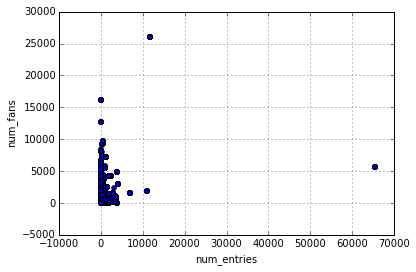

In [6]:
# logins are associated some with friends and groups

# looks like the fans increase with more posts, this makes sense. But is it linear?
dataframe.plot(kind='scatter', x='num_entries', y='num_fans')

In [7]:
# wow we found some outliers! Let's look at them.

#user with the most entries
print(dataframe['num_entries'].argmax())

#user with the most fans
print(dataframe['num_fans'].argmax())
dataframe.ix[(dataframe['num_fans'].argmax())]

2
39992


gender                                                                  F
num_groups                                                          65526
num_entries                                                         11695
num_fans                                                            26038
num_friends                                                         25445
created                                                        2008-01-23
last_login                                            2015-07-09 22:26:05
num_logins                                                          11656
last_wall_activity                                    2015-07-09 19:43:56
last_circle_activity                                  2015-07-09 19:55:38
birthdate                                                      1970-08-31
gid                                                                 71091
content                 Shadow and Â light dancing across the room, ou...
date_posted                           

In [8]:
dataframe.ix[39992]["content"]

'Shadow and Â\xa0light dancing across the room, our naked bodies consumed within them. The crazy dance of a flame as it flickers, mirroring the passion of our lovemaking.  The Â\xa0sting of a drop of wax as it meets my soft flesh. These are a few of my favorite Â\xa0things .<br />\n<br />\nGoose bumps rising as you breathe on my neck. Moonlight glistening Â\xa0on lightly oiled Â\xa0skin. The taste Â\xa0of your skin on my tongue . How  your eyes dance when I am on my knees.  That growl in your voice as you say my name.  These are a few of the things I look forward to.'

In [9]:
#this could be a real person but their posts are definitely skewing results so we could remove

#remove the outlier users
dataframe = dataframe[dataframe.num_entries != 65535]
dataframe = dataframe[dataframe.num_fans != 26038]

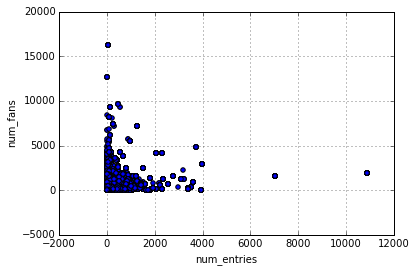

In [10]:
#plot again now that we've removed these outliers
dataframe.plot(kind='scatter', x='num_entries', y='num_fans')

We see some interesting directions we could go with this data. 
Since it was quite large and we only had 3 weeks to do this project, our group focused on the top groups and users within them. This sped up data processing and allowed us to focus on analyzing the content of the posts using NLP.

First we had to integrate some additional data, as we didn't have any way to know group names corresponding to group ids, nor did we have user ids, which would be useful for tracking user behavior across time and groups.

The next section focuses on these problems.

In [11]:
# let's add user ids

# Mentor Adam gave us the file 'members.csv' which had user ids
# we need to join this to our dataframe
members = pd.read_csv('members.csv')
print(members.shape)
print(members.head())

(972845, 5)
   mid gender     created   birthdate           last_login
0    1      M  2005-11-21  1989-03-09  2015-02-04 16:57:18
1   10      F  2006-01-31  1984-03-10  2015-04-11 04:34:58
2  266      F  2006-03-24         NaN  2015-04-11 22:14:54
3  441      F  2006-05-05  1989-03-09  2015-05-06 06:17:47
4  691      M  2006-05-20  1979-03-12  2015-06-12 18:15:33


In [12]:
old_dataframe = dataframe
dataframe = pd.merge(old_dataframe, members, how='left', on=['gender', 'created', 'birthdate', 'last_login'])

print(old_dataframe.shape)
print(dataframe.shape)

(495932, 16)
(495934, 17)


In [13]:
dataframe.head()

,gender,num_groups,num_entries,num_fans,num_friends,created,last_login,num_logins,last_wall_activity,last_circle_activity,birthdate,gid,content,date_posted,votes,num_comments,mid
0,F,210,54,25,2,2014-12-20,2015-04-03 12:45:01,6,0000-00-00 00:00:00,0000-00-00 00:00:00,1997-03-31,124249,I just want my mom to hug me and say that she ...,2015-01-01 00:00:10,0,0,9343578
1,F,25,9,2,0,2014-08-28,2015-04-15 22:32:36,19,0000-00-00 00:00:00,0000-00-00 00:00:00,1994-03-31,5276,I don't know why this is happening right now. ...,2015-01-01 00:00:46,0,0,8866629
2,M,153,2,6,5,2014-12-13,2015-06-01 20:34:52,15,0000-00-00 00:00:00,2014-12-13 08:37:11,1993-11-30,58852,HAPPY NEW YEARS !!!!!!!!!!!!!!! !!!!!!!!!...,2015-01-01 00:02:39,1,2,9318824
3,F,29,8,83,60,2014-12-27,2015-05-14 13:25:09,19,0000-00-00 00:00:00,2015-05-14 13:25:34,1977-08-31,970365,Showing now if anyone is interested...message ...,2015-01-01 00:02:45,0,0,9367848
4,M,14,1,2,0,2013-12-13,2015-01-07 01:57:45,1,0000-00-00 00:00:00,0000-00-00 00:00:00,1990-10-31,262541,I am in love with this beautiful girl.....<br ...,2015-01-01 00:03:01,10,9,7581701


In [14]:
# some entries don't have corresponding member ids. 
# We're guessing that they deleted their accounts before members.csv was made
dataframe[pd.isnull(dataframe['mid'])]

,gender,num_groups,num_entries,num_fans,num_friends,created,last_login,num_logins,last_wall_activity,last_circle_activity,birthdate,gid,content,date_posted,votes,num_comments,mid
5,F,2993,62,353,7,2014-07-18,2015-07-09 06:55:52,43,2015-03-19 17:28:56,2015-03-12 17:44:25,1996-01-31,261634,My birthday is in a few weeks 18 days everyone...,2015-01-01 00:04:52,3,5,NaN
11,M,304,25,49,29,2014-12-13,2015-07-06 07:37:41,1,0000-00-00 00:00:00,0000-00-00 00:00:00,1962-10-31,565765,Celebrating New Years in the nude. I hope to s...,2015-01-01 00:08:02,2,2,NaN
15,F,1601,10,95,7,2014-02-25,2015-07-02 14:51:38,476,2014-03-05 22:45:29,2015-03-11 14:16:29,1983-12-31,627239,No place far enough. <br />\nI ve crossed ocea...,2015-01-01 00:10:00,1,0,NaN
17,F,751,6,84,41,2014-12-26,2015-07-01 16:00:39,38,2015-04-06 00:26:50,2015-04-07 23:12:16,2001-04-30,3941,"I just hate being lied to, to me it's one of t...",2015-01-01 00:10:19,4,0,NaN
23,M,239,69,117,84,2014-12-18,2015-07-09 16:51:14,35,0000-00-00 00:00:00,2015-06-08 23:04:15,2000-01-31,335,i know...this may sound a little inapropriat3....,2015-01-01 00:12:46,1,1,NaN
25,F,374,279,226,19,2014-12-24,2015-07-09 07:49:05,221,2015-02-12 18:12:20,2015-06-14 14:29:03,1990-07-31,675119,I'm drunk right now and it feel good I'm layin...,2015-01-01 00:13:33,3,2,NaN
26,F,247,22,246,9,2014-04-16,2015-07-09 22:58:23,3,0000-00-00 00:00:00,0000-00-00 00:00:00,1999-10-31,293608,Happy new year! Wish you guys all the best,2015-01-01 00:14:04,2,1,NaN
27,F,9,7,10,0,2014-01-30,2015-07-09 21:44:17,4,2014-01-31 17:59:51,2014-01-31 18:00:38,1991-12-31,173000,After everything I went through in 2014...hear...,2015-01-01 00:14:05,0,0,NaN
29,F,300,37,38,9,2014-11-05,2015-05-30 15:58:28,76,2014-11-26 19:02:32,2015-02-24 02:13:59,1999-06-30,185,"All I want for this New Year is to feel safe, ...",2015-01-01 00:14:45,3,1,NaN
30,M,239,61,49,48,2013-07-17,2015-07-09 14:35:49,1111,2015-04-10 22:06:50,2015-01-02 21:49:33,1959-06-30,972256,I hope it's a good year for everyone,2015-01-01 00:14:46,1,1,NaN


In [15]:
# let's add group names too
gnames = pd.read_csv('group_names.csv', header=None)
gnames.columns = ['gid', 'group']
print(gnames.shape)
print(gnames.head())

(853996, 2)
   gid                 group
0   20               Love U2
1   21        Love Dane Cook
2   22  Love Pablo Francisco
3   23     Love George Lopez
4   24       Love Bill Cosby


In [16]:
old_dataframe = dataframe
dataframe = pd.merge(old_dataframe, gnames, how='left', on='gid')
print(old_dataframe.shape)
print(dataframe.shape)
dataframe.head()

(495934, 17)
(495934, 18)


,gender,num_groups,num_entries,num_fans,num_friends,created,last_login,num_logins,last_wall_activity,last_circle_activity,birthdate,gid,content,date_posted,votes,num_comments,mid,group
0,F,210,54,25,2,2014-12-20,2015-04-03 12:45:01,6,0000-00-00 00:00:00,0000-00-00 00:00:00,1997-03-31,124249,I just want my mom to hug me and say that she ...,2015-01-01 00:00:10,0,0,9343578,Wish My Mom and I Were Closer
1,F,25,9,2,0,2014-08-28,2015-04-15 22:32:36,19,0000-00-00 00:00:00,0000-00-00 00:00:00,1994-03-31,5276,I don't know why this is happening right now. ...,2015-01-01 00:00:46,0,0,8866629,Don't Have Any Friends
2,M,153,2,6,5,2014-12-13,2015-06-01 20:34:52,15,0000-00-00 00:00:00,2014-12-13 08:37:11,1993-11-30,58852,HAPPY NEW YEARS !!!!!!!!!!!!!!! !!!!!!!!!...,2015-01-01 00:02:39,1,2,9318824,Want to Wish Everyone a Happy New Years
3,F,29,8,83,60,2014-12-27,2015-05-14 13:25:09,19,0000-00-00 00:00:00,2015-05-14 13:25:34,1977-08-31,970365,Showing now if anyone is interested...message ...,2015-01-01 00:02:45,0,0,9367848,Am Showing My Girl On Join Me Now
4,M,14,1,2,0,2013-12-13,2015-01-07 01:57:45,1,0000-00-00 00:00:00,0000-00-00 00:00:00,1990-10-31,262541,I am in love with this beautiful girl.....<br ...,2015-01-01 00:03:01,10,9,7581701,Don't Say I Love You Unless I Mean It


In [17]:
# count how many times each group id occurs
groups = dataframe["group"].value_counts()
print("top 50 groups are:\n",groups.head(n=50))

# how many groups are represented in our dataset?
print("the dataset has %d group ids" % len(groups))

top 50 groups are:
 Love Music                                     7568
Have Random Thoughts                           6456
Am a New Member At Experience Project          4515
Am The Other Woman                             3998
Have a Confession                              3329
Battle Depression                              2664
Like a Good Quote                              2507
Need Someone to Talk to                        2003
Am Lonely                                      1979
Am a Military Girlfriend                       1756
Love Jokes And Riddles                         1535
Love These Lyrics                              1509
Write Poetry                                   1297
Am a Curious Person                            1214
Love Quotes                                    1206
Am An Atheist                                  1202
Live In a Sexless Marriage                     1115
Am Gay                                         1108
Like Writing Limericks                      

In [18]:
#subset the top 50 groups
top50 = groups[0:50]
print('there are %d total posts in the top 50 groups' % top50.sum())

there are 71397 total posts in the top 50 groups


In [19]:
#take subset of posts for top 50 groups:
topgroups = []
for index, row in top50.iteritems():
    topgroups.append(index)
print('The top 50 groups are:\n',topgroups)
df_subset = dataframe[dataframe['group'].isin(topgroups)]
len(df_subset)

The top 50 groups are:
 ['Love Music', 'Have Random Thoughts', 'Am a New Member At Experience Project', 'Am The Other Woman', 'Have a Confession', 'Battle Depression', 'Like a Good Quote', 'Need Someone to Talk to', 'Am Lonely', 'Am a Military Girlfriend', 'Love Jokes And Riddles', 'Love These Lyrics', 'Write Poetry', 'Am a Curious Person', 'Love Quotes', 'Am An Atheist', 'Live In a Sexless Marriage', 'Am Gay', 'Like Writing Limericks', 'Am Christian', 'Love a Good Quote', 'Believe In God', 'Think Too Much', 'Am Single', 'Had A Dream', 'Have a Weird Sense of Humor', 'Want You to Write a Ten Word Story', 'Am Fascinated By Human Behavior', 'Love This Song', 'Want to Lose Weight', 'Love Movies', 'Am Bored', 'Am Depressed', 'Will Answer Any Question You Dare Ask', 'Love Photography', 'Want To Know If You Think Im Attractive Lol', 'Want to Make Friends', 'Have Anxiety', 'Am a Lesbian', 'Had An Affair', 'Fight Depression and Loneliness Everyday', 'Like to Take Pictures', 'Express Myself Thro

71397

In [20]:
#make a dictionary of the top groups to be used later in NLP analysis
groupdict = dict(top50)
group_words = dict.fromkeys(groupdict)
for key in group_words:
    group_words[key] = []
print(group_words)

{'Am The Other Woman': [], 'Fight Depression and Loneliness Everyday': [], 'Love a Good Quote': [], 'Have A Kik-Messenger App': [], 'Am a New Member At Experience Project': [], 'Am Lonely': [], 'Have Anxiety': [], 'Am Fascinated By Human Behavior': [], 'Am Depressed': [], 'Had An Affair': [], 'Am a Military Girlfriend': [], 'Have a Weird Sense of Humor': [], 'Have Weird Dreams': [], 'Am a Curious Person': [], 'Believe In God': [], 'Think Too Much': [], "Loved Someone That Didn't Love Me": [], 'Cut My Self': [], 'Want to Make Friends': [], 'Need Someone to Talk to': [], 'Love Music': [], 'Want to Lose Weight': [], 'Suffered Through Workplace Mobbing': [], 'Love Movies': [], 'Am An Atheist': [], 'Want You to Write a Ten Word Story': [], 'Love Jokes And Riddles': [], 'Want To Know If You Think Im Attractive Lol': [], 'Will Answer Any Question You Dare Ask': [], 'Have a Confession': [], 'Am a Gamer': [], 'Am a Lesbian': [], 'Will Answer Anything You Ask': [], 'Like Writing Limericks': [], 

### NLP on the 'content' of the posts 
Now that we have our subset, let's clean up the posts so we can look at the contents

The following takes a series of text inputs (in this case status updates on the Experience Project), pre-processes the text to remove extraneous words, HTML, and punctuation, and creates a bag of words that allows for downstream analysis of the language.
In this example, I stop at a point where the most common words in the test set have been found.

In [21]:
#set up the environment
from bs4 import BeautifulSoup
import re
import nltk
#nltk.download()
from nltk.corpus import stopwords # Import the stop word list

def status_to_words( raw_status ):
    # Function to convert a raw status to a string of words
    # The input is a single string (a raw status update), and 
    # the output is a single string (a preprocessed status update)
    #
    # 1. Remove HTML
    status_text = BeautifulSoup(raw_status).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", status_text)
    # remove http URLs
    letters_only = re.sub(r'^https?:\/\/.*[\r\n]*', '', letters_only)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #Remove 'm' and 'hasn' from the text
    stops = stops.union([u'hasn',u'm',u've',u'll',u're',u'didn',u'us',u'im',u'doesn',u'couldn',u'won',u'isn',u'http',u'www']) 
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))


#Let's see an example of what status_to_words does
clean_status = status_to_words(df_subset['content'].iloc[3])
print (clean_status)

st let start saying happy new years hope yall staying safe fun begin spend life studying people meet even strangers often see year decided come new years party friends throwing found everything pretty interesting friends emotions attitudes intensify extreme influence alcohol though obvious thing happen strange mix characters emotions change yet friend one caring well others either sober drunk others introduced suddenly relaxed even cared anything world friend two emotionless actually part group people met cannot read due lack expressing emotions drunk slight emotions shown introduced group already bad shyness seems intensify friend three usually calm smooth women drunk smooth talking turns embarrassing blurred speech introduced group anger usually contained explodes restrained point drink reasoning behind due dark past family kind alcohol wanna end like also stay sober keep safe whenever try get behind car drunk love guys feel got know bit better light love study people tend able help 

In [22]:
for i in range(0,100):
    if( (i+1)%10000 == 0 ):
        print ("Status %d of %d\n" % (i+1, len(df_subset)))
    key = df_subset.iloc[i]['group']
    status = df_subset.iloc[i]['content']
    clean_status = status_to_words(status)
    group_words[key].append(clean_status)


In [23]:
#join the seperate statuses into one for each group
for key in group_words:
    group_words[key] = " ".join(group_words[key])

In [27]:
# create the Bag o' words. Each word that appears in the statuses after preprocessing gets a place
# in the bag (list). Each status gets a list denoting the number of times a particular word
# shows up in that status.  Check out 
# https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

print("Creating the bags of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

n = 0
with open('demotop50.csv', 'w') as out:
    out.write('These are the top 50 most-posted-in groups from Experience Project:\nFormat is >gid, followed by lines for each word sorted by frequency.\n\n\n')
    for group in group_words:
        n += 1
        out.write('>'+str(group)+'\n')
        print('working on group %s' % group)
        words = [group_words[group]]
        # Initialize the "CountVectorizer" object, which is scikit-learn's
        # bag of words tool. Note that some of the preprocessing steps above
        # can be done directly with this tool; we may want to do that.
        vectorizer = CountVectorizer(analyzer = "word",   \
                                     tokenizer = None,    \
                                     preprocessor = None, \
                                     stop_words = None,   \
                                     max_features = 500) 

        # fit_transform() does two functions: First, it fits the model
        # and learns the vocabulary; second, it transforms our training data
        # into feature vectors. The input to fit_transform should be a list of 
        # strings.
        train_data_features = vectorizer.fit_transform(words)

        # Numpy arrays are easy to work with, so convert the result to an 
        # array
        train_data_features = train_data_features.toarray()

        vocab = vectorizer.get_feature_names()
        dist = np.sum(train_data_features, axis = 0)
        counted = zip(vocab, dist)
        for tag, count in sorted(counted, key=lambda counted: counted[1], reverse=True):
            out.write(tag+','+str(count)+'\n')
        print(n)

Creating the bags of words...

working on group Am The Other Woman
1
working on group Fight Depression and Loneliness Everyday
2
working on group Love a Good Quote


ValueError: empty vocabulary; perhaps the documents only contain stop words